In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/Housing_price_pred.csv')
data=data.drop(['Unnamed: 0','driveway','recroom','fullbase','airco','prefarea', 'gashw'],axis=1)

data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl
0,42000.0,5850,3,1,2,1
1,38500.0,4000,2,1,1,0
2,49500.0,3060,3,1,1,0
3,60500.0,6650,3,1,2,0
4,61000.0,6360,2,1,1,0


In [4]:
data.shape

(546, 6)

In [5]:
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl'], dtype='object')

In [6]:
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
garagepl    0
dtype: int64

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in data.columns:
  le.fit_transform(data[column])

<Axes: >

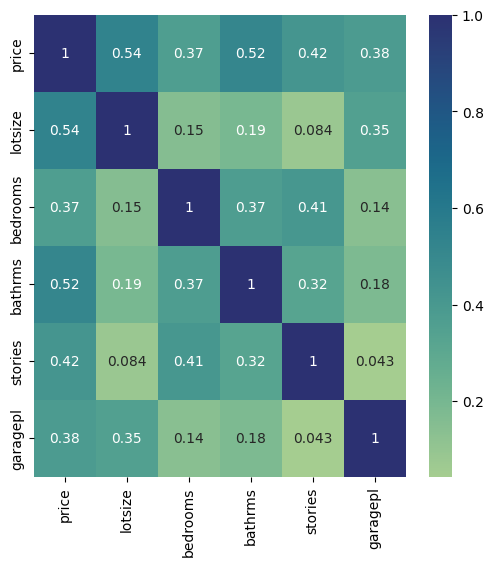

In [10]:
plt.figure(figsize = (6,6))
sns.heatmap(data.corr(),cmap="crest",annot=True)

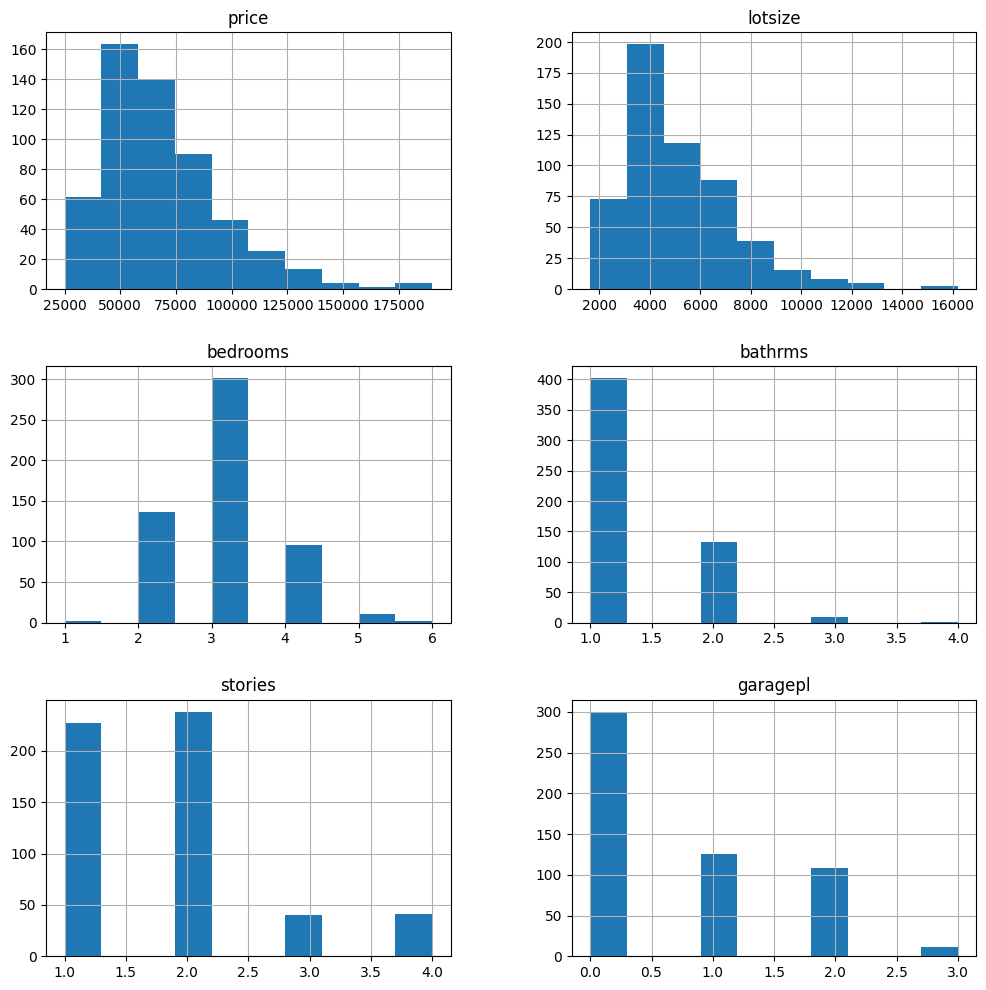

In [11]:
data.hist(figsize=(12,12))
plt.show()

In [12]:
y = data['price']
X = data.drop(columns = 'price')

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 5)
(110, 5)
(436,)
(110,)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MSE = 399438232.21


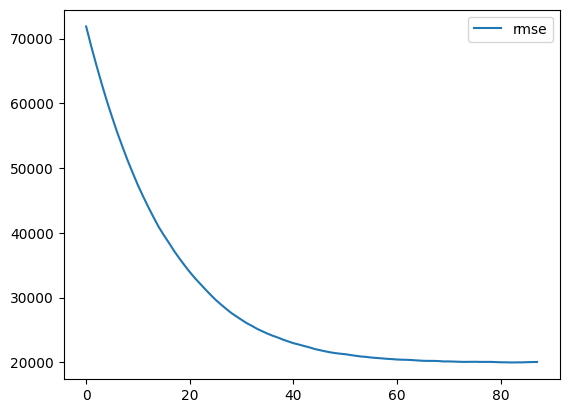

In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

exb = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

#training the data
exb.fit(X_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(X_test, y_test)],
             verbose=False)

#making our predictions
exb_pred = exb.predict(X_test)

#getting the mse
exb_mse = mean_squared_error(y_test, exb_pred)
print("MSE =",(round(exb_mse,2)))

#getting the training resutls
results = exb.evals_result()
plt.plot(results['validation_0']['rmse'], label='rmse')
# show the legend
plt.legend()
# show the plot
plt.show()

Minimum validation loss: 19862.849609375
4/4 [==============================] - 0s 2ms/step
MSE = 729087167.34


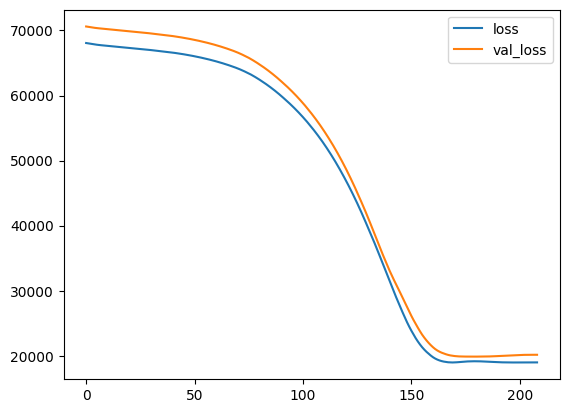

In [15]:
#deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

seed = 1
tf.random.set_seed(seed)

#setting up the keras sequential model
model = keras.Sequential([
    layers.Dense(28, activation='relu', input_shape=[5]),
    layers.Dense(28, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(1),
])

#compiling the model perameters
model.compile(
    optimizer='adam',
    loss='mae'
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

#traing the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

#plotting the loss results
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0)

#making the predictions
dnn_pred = model.predict(X_test)

#getting our results
dnn_mse = mean_squared_error(y_test,dnn_pred)

#printing rmse
print("MSE =",(round(dnn_mse,2)))